# Monty Hall Problem Simulation

The Monty Hall Problem is a famous probability puzzle based on a game show scenario. Imagine you're a contestant with three doors in front of you. Behind one door is a car (the prize you want), and behind the other two doors are goats. You pick one door, but instead of revealing what's behind it, the host, Monty, opens a different door, showing a goat. Then, he gives you a choice: stick with your original pick or switch to the remaining unopened door.

Though it might seem like it doesn’t matter, switching doors actually doubles your chances of winning the car—from 1 in 3 to 2 in 3. This is because, when you first choose, you have a 1 in 3 chance of picking the car, leaving a 2 in 3 chance that it’s behind one of the other two doors. Monty’s reveal gives you extra information, making switching the better choice.

**I created this notebook to run a numerical simulation and convince myself that my chances of winning really do double when I switch doors.**

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def monty_hall_one_game(switch_door):
    # All doors have a goat initially
    doors = np.array([0, 0, 0])

    # Randomnly decide which door will have a car
    winner_index = np.random.randint(0, 3)

    # Randomnly decide which door will have a car
    doors[winner_index] = 1

    # Participant selects a door at random
    choice = np.random.randint(0, 3)

    # Get doors that can be opened (host cannot open the door chosen or the one with the car)
    openable_doors = [idx for idx in {0, 1, 2} if idx not in (winner_index, choice)]

    # Host opens one of the available doors at random
    door_to_open = np.random.choice(openable_doors)

    # Switch to the other available door (the one that is not the original choice or the opened one)
    if switch_door:
        choice = [idx for idx in {0, 1, 2} if idx not in (choice, door_to_open)][0]

    # Return 1 if you open a door with a car, 0 otherwise
    return doors[choice]

In [3]:
# Simulation
num_games = 1000

do_not_switch_door = [monty_hall_one_game(False) for _ in range(num_games)]
switch_door = [monty_hall_one_game(True) for _ in range(num_games)]

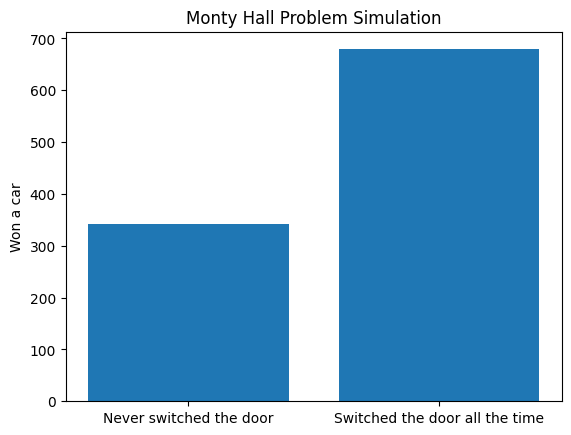

In [4]:
plt.bar(['Never switched the door', 'Switched the door all the time'], [sum(do_not_switch_door), sum(switch_door)])
plt.ylabel('Won a car')
plt.title('Monty Hall Problem Simulation')
plt.show()